In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import gridspec

In [2]:

def ellipse_parameters(ellipse_params):
    
    """
    ellipse_params - ellipse parameters from the fit
    Ellipse(x,y) = ax^2 + bxy + cy^2 + dx + ey + f = 0
    """
    
    # Extract parameters
    # based on https://mathworld.wolfram.com/Ellipse.html
    a, b, c, d, e, f = (ellipse_params[0], ellipse_params[1]/2, ellipse_params[2], 
                        ellipse_params[3]/2, ellipse_params[4]/2, ellipse_params[5])
    
    # Calculate the ellipse center
    x0 = (c*d - b*e) / (b**2 - a*c)
    y0 = (a*e - b*d) / (b**2 - a*c)
    
    # Calculate the axis lengths
    numerator = 2*(a*e**2 + c*d**2 + f*b**2 - 2*b*d*e - a*c*f)
    denominator1 = (b**2 - a*c) * ((c - a)*np.sqrt(1 + 4*b**2 / ((a - c)**2)) - (c + a))
    denominator2 = (b**2 - a*c) * ((a - c)*np.sqrt(1 + 4*b**2 / ((a - c)**2)) - (c + a))
    axis1 = np.sqrt(numerator / denominator1)
    axis2 = np.sqrt(numerator / denominator2)
    
    # Calculate the rotation angle
    angle = 0.5 * np.arctan(2*b / (a - c))

    
    return x0, y0, axis1, axis2, angle


# -------------- # -------------- # -------------- # -------------- # 

def fit_ellipse(x, y):
    """
    x and y - points on the ellipse
    """
    # Define the design matrix - conic equation
    # Ellipse(x,y) = ax^2 + bxy + cy^2 + dx + ey + f = 0
    D = np.vstack((x**2, x*y, y**2, x, y, np.ones_like(x))).T
    
    # Scatter matrix
    S = D.T @ D

    # Constraint matrix enforces the conic section to be an ellipse.
    # This matrix has specific entries set to 2 and -1 to form the 
    # constraint equation needed for ellipse fitting.
    C = np.zeros((6, 6))
    C[0, 2] = 2
    C[1, 1] = -1
    C[2, 0] = 2

    # Solve the generalized eigenvalue problem
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S) @ C)

    # Extract the eigenvector corresponding to the positive eigenvalue
    ellipse_parameters = eigvecs[:, np.argmax(eigvals)]

    return ellipse_parameters



def start_fitting(x,y,ey):
    """
    x, y, ey - points on the ellipse and their associated errors in y-direction
    """
    parameters = fit_ellipse(x,y)
    num_inter = 1000
    x0, y0, axis1, axis2, angle = ellipse_parameters(parameters)

    
    x0_rand, y0_rand, axis1_rand, axis2_rand, angle_rand = np.empty((5, num_inter))
    parameters_rand2 = []
    
    for i in range(num_inter):
        parameters_rand = fit_ellipse(x,np.random.normal(y,ey))
        
        x0_rand[i], y0_rand[i], axis1_rand[i], axis2_rand[i], angle_rand[i] = ellipse_parameters(parameters_rand)
        parameters_rand2.append(parameters_rand)
        
    return axis1_rand, axis2_rand, np.degrees(angle_rand), np.array(parameters_rand2), parameters


def ellipse_for_plot(ellipse_params):
    
    # Extract parameters
    # based on https://mathworld.wolfram.com/Ellipse.html
    a, b, c, d, e, f = (ellipse_params[0], ellipse_params[1]/2, ellipse_params[2], 
                        ellipse_params[3]/2, ellipse_params[4]/2, ellipse_params[5])
    
    # Calculate the ellipse center
    x0 = (c*d - b*e) / (b**2 - a*c)
    y0 = (a*e - b*d) / (b**2 - a*c)
    
    # Calculate the axis lengths
    numerator = 2*(a*e**2 + c*d**2 + f*b**2 - 2*b*d*e - a*c*f)
    denominator1 = (b**2 - a*c) * ((c - a)*np.sqrt(1 + 4*b**2 / ((a - c)**2)) - (c + a))
    denominator2 = (b**2 - a*c) * ((a - c)*np.sqrt(1 + 4*b**2 / ((a - c)**2)) - (c + a))
    axis1 = np.sqrt(numerator / denominator1)
    axis2 = np.sqrt(numerator / denominator2)
    
    # Calculate the rotation angle
    angle = 0.5 * np.arctan(2*b / (a - c))
    
    
    return x0, y0, axis2_rand, axis1_rand, angle



In [4]:
"""
Half-maxima (roots) determined using the Gaussian mixture model (GMM) from:

https://scikit-learn.org/stable/modules/mixture.html

with their associated uncertanities (eroots). The y_roots represent values in the 
Y-coordinate (horizontal axis), and max_roots stand for maxima of the fitted (GMM).
"""

roots = np.array([ 6736.43309515,  6771.33951185,  6772.13625526,  6813.77083901, 
                   6581.64325011,  6479.65287101,  6474.17514206,  6434.29163362, 
                   6230.2610428 ,  6105.70246594, 10699.06372192, 10571.02309934, 
                   10450.98222246, 10335.98956882,  9813.67590958,  9828.66946919, 
                   9658.76082413,  9379.56743922,  9185.0734551 ,  9473.73318076])

eroots = np.array([ 65.17152796,  77.69931527,  73.07804225,  52.75037277,
                    46.2456856 ,  41.45031505,  50.80301162,  53.51913855, 
                    47.08312988,  64.22644491, 109.64002487,  97.91687208, 
                    93.41523977,  78.74594252,  72.64828253,  93.33302508, 
                    111.84508201,  69.87402769,  66.69938662,  73.88833783])

y_roots = np.array([-531.54859567, -410.99373857, -297.08358324, -172.12296883, 
                    -58.57645574,   53.04169437,  166.18848089,  276.60891482, 
                    383.7001569 ,  481.13848337, -844.22604902, -641.61962289, 
                    -458.46910487, -261.09789314,  -87.34146332,   80.45635969, 
                    247.935027,  403.22573464,  565.67679936,  746.54433947])

max_roots = np.array([8569.7569757 , 8741.67416742, 8566.15661566, 8478.84788479,
                      8081.00810081, 8007.20072007, 7970.2970297 , 7856.88568857, 
                      7684.96849685, 7785.77857786])


In [5]:
axis_b_rand, axis_a_rand, angle_rand, par_rand, par = start_fitting(y_roots/1000., 
                                                                    roots/1000., 
                                                                    eroots/1000.) # /1000 pc -> to -> kpc

print("Bar angle = %.0f ± %.0f deg" %(np.average(angle_rand), np.std(angle_rand)) )
print("b/a = %.2f ± %.2f deg" %(np.average(axis_b_rand/axis_a_rand), np.std(axis_b_rand/axis_a_rand)) )

Bar angle = 18 ± 2 deg
b/a = 0.46 ± 0.01 deg


### Figure

In [6]:
def get_ellipse_points(params, n_points=100, t_min=0, t_max=2*np.pi):
    """
    Return n_points on the ellipse described by the params = x0, y0, ap,
    bp, phi for values of the parametric variable t between t_min and t_max.
    We used this to depict the individual ellipses fitted our datapoints.
    """

    x0, y0, ap, bp, phi = params
    
    # A grid of the parametric variable, t, representing all angles
    t = np.linspace(t_min, t_max, n_points)
    
    x = x0 + ap * np.cos(t) * np.cos(phi) - bp * np.sin(t) * np.sin(phi)
    y = y0 + ap * np.cos(t) * np.sin(phi) + bp * np.sin(t) * np.cos(phi)
    
    return x, y

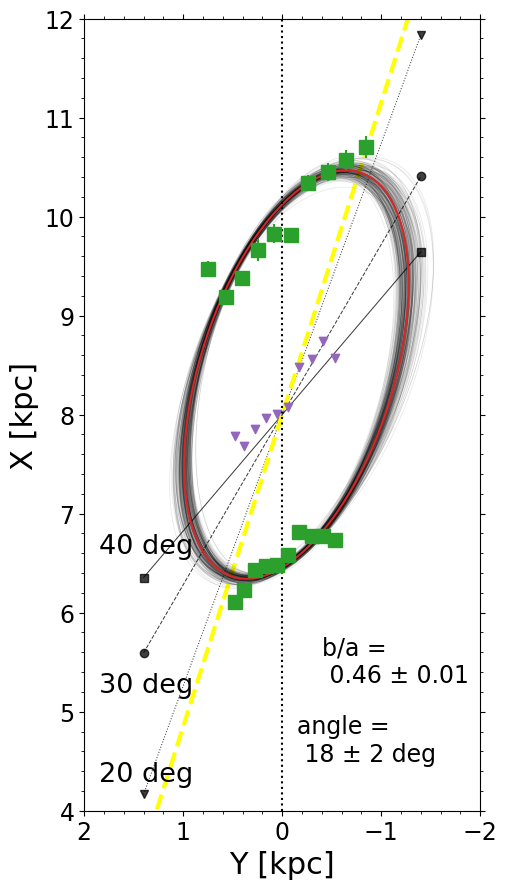

In [8]:

f = plt.figure(figsize=(9,9))
gs = gridspec.GridSpec(nrows=1, ncols=1, figure=f) 

ax1 = plt.subplot(gs[0,0])


x0_, y0_, axis1_, axis2_, angle_ = np.empty((5, len(par_rand[:,0])))

for i in range(len(par_rand[:,0])):
    x0, y0, ap, bp, phi = ellipse_parameters(par_rand[i])
    x0_[i], y0_[i], axis1_[i], axis2_[i], angle_[i] = ellipse_parameters(par_rand[i])
    x, y = get_ellipse_points((x0, y0, ap, bp, phi))
    if i % 5 == 0:
        ax1.plot(x, y, c="k",alpha=0.1,lw=0.5, rasterized=True)

    
x, y = get_ellipse_points( (np.median(x0_), 
                           np.median(y0_), 
                           np.median(axis1_), 
                           np.median(axis2_), 
                           np.median(angle_)) )

ax1.plot(x, y, c="C3", label="Fitted ellipse")


ax1.errorbar(y_roots/1000, roots/1000, yerr=eroots/1000, fmt="s", 
             c="C2", markersize=10)
ax1.scatter(y_roots[:int(len(y_roots)/2)]/1000, max_roots/1000, c="C4", marker="v")

ax1.set_xlim(2,-2)
ax1.set_ylim(4.,12)

ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.tick_params(axis='both', which='minor', labelsize=17)
ax1.set_xlabel("Y [kpc]", fontsize=22)
ax1.set_ylabel("X [kpc]", fontsize=22)
ax1.minorticks_on()
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.annotate("angle = \n %.0f ± %.0f deg" %(np.average(angle_rand), np.std(angle_rand)), 
             (-0.15, 4.5), xytext=None, 
             xycoords='data', color="k", 
             fontsize=17)
    
    
x_40, y_40 = np.array([4, -4]), np.array([3.3, 12.7])
x_30, y_30 = np.array([3.2, -3.2]), np.array([2.5, 13.5])
x_20, y_20 = np.array([2.3, -2.3]), np.array([1.7, 14.3])


b_40 = np.polyfit(x_40, y_40, deg=1)
b_30 = np.polyfit(x_30, y_30, deg=1)
b_20 = np.polyfit(x_20, y_20, deg=1)

fitt_artef_angle = np.array([1.4, -1.4])



ax1.plot(fitt_artef_angle, np.polyval(b_40, fitt_artef_angle), 
         color="k", alpha=0.75, marker="s", 
         ls="-", zorder=-10, lw=0.75 )

ax1.plot(fitt_artef_angle, np.polyval(b_30, fitt_artef_angle), 
         color="k", alpha=0.75, marker="o", 
         ls="--", zorder=-10, lw=0.75 )

ax1.plot(fitt_artef_angle, np.polyval(b_20, fitt_artef_angle), 
         color="k", alpha=0.75, marker="v", 
         ls=":", zorder=-10, lw=0.75 )

ax1.annotate(r"20 deg", 
             (1.85, 4.3), xytext=None, 
             xycoords='data', color="k", 
             fontsize=19.5)

ax1.annotate(r"30 deg", 
             (1.85, 5.2), xytext=None, 
             xycoords='data', color="k", 
             fontsize=19.5)

ax1.annotate(r"40 deg", 
             (1.85, 6.6), xytext=None, 
             xycoords='data', color="k", 
             fontsize=19.5)


# -------------------------------- #
ax1.plot(fitt_artef_angle, 
         np.polyval(np.array([np.tan(np.radians(-90.+np.average(angle_rand))), 8.0]), 
                    fitt_artef_angle),
         color="yellow", 
         alpha=1, 
         zorder=-10, 
         ls="--", lw=3)
ax1.axvline(0, ls=":", c="k")


b_a_vi = axis_b_rand/axis_a_rand
ax1.annotate("b/a =\n %.2f ± %.2f" %(np.average(b_a_vi), np.std(b_a_vi)), 
             (-0.4, 5.3), xytext=None, 
             xycoords='data', color="k", 
             fontsize=17)
# -------------------------------- #

ax1.set_aspect('equal')

f.tight_layout()

plt.show()